## Texts preparation for keywords analysis
In this notebook, we will combine the parsed texts to:
- create a Wordcloud for visualization
- create a new series for each row that has all text strings in there for keywords_analysis


#### Parse ['keywords']

In [7]:
import pandas as pd
import ast

keywords_df = pd.read_csv("../../source_data/keywords.csv")

# Function to parse the string and extract names
def extract_names(keyword_string):
    # Safely evaluate the string to a Python object
    keyword_list = ast.literal_eval(keyword_string)
    # Extract names
    names = [keyword['name'] for keyword in keyword_list]
    return names

# Apply the function to the DataFrame
keywords_df['keywords_parse'] = keywords_df['keywords'].apply(extract_names)

# Display the DataFrame
keywords_df.head(20)


,id,keywords,keywords_parse
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[jealousy, toy, boy, friendship, friends, riva..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[board game, disappearance, based on children'..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[fishing, best friend, duringcreditsstinger, o..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[based on novel, interracial relationship, sin..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[baby, midlife crisis, confidence, aging, daug..."
5,949,"[{'id': 642, 'name': 'robbery'}, {'id': 703, '...","[robbery, detective, bank, obsession, chase, s..."
6,11860,"[{'id': 90, 'name': 'paris'}, {'id': 380, 'nam...","[paris, brother brother relationship, chauffeu..."
7,45325,[],[]
8,9091,"[{'id': 949, 'name': 'terrorist'}, {'id': 1562...","[terrorist, hostage, explosive, vice president]"
9,710,"[{'id': 701, 'name': 'cuba'}, {'id': 769, 'nam...","[cuba, falsely accused, secret identity, compu..."


#### Combine keywords from keywords_df with movies_df ['Tagline'] and ['Overview']
First, we are combining 3 series of data into one string:
- ['keywords']
- ['Tagline']
- ['Overview']

Transform strings in ['Keywords'] into one string file.

In [8]:
## join the text string in each row as one string and then append to "text_list".

# combine strings in ['keywords_parse'] 
text_list_1=[]
for each_list in keywords_df.keywords_parse: 
    string_text = " ".join(each_list)
    text_list_1.append(string_text)
    
# join all lists into one string "master_string_text" to be used for WordCloud.
string_text_1 = " ".join(text_list_1)

# total keywords: 1,745,187
print('Total texts in text 1:',len(string_text_1))   



Total texts in text 1: 1745187


Transform strings in ['Tagline'] into one string file.

In [11]:
# combine strings in ['Tagline']
new_movies_df = pd.read_csv("../../edit_data/cleaned_data/movies_main.csv")

#drop na values before joining the text.
filt = (new_movies_df['Tagline'].isna() == False)
filtered_tagline = new_movies_df.loc[filt]['Tagline']

text_list_2=[]
for new_text in filtered_tagline:
    # text_list.append(new_text)
    text_list_2.append(new_text)

string_text_2 = " ".join(text_list_2)
print("number of text2: ",len(string_text_2))


number of text2:  972369


Transform strings in ['Overview'] into one string file.
- create a master_string_text to be used for WordCloud

In [12]:
filt_ = (new_movies_df['Overview'].isna() == False)
filtered_tagline = new_movies_df.loc[filt_]['Overview']

text_list_3=[]
for new_text in filtered_tagline:
    # text_list.append(new_text)
    text_list_3.append(new_text)

string_text_3 = " ".join(text_list_3)
print("number of texts in text 3: ",len(string_text_3))

## join text 1 (keywords), text 2 (tagline) and text 3 (overview) into master_string_text.
master_string_text = string_text_1 + string_text_2 + string_text_3
print("number of text in master_string_text: ",len(master_string_text))


number of texts in text 3:  14247052
number of text in master_string_text:  16964608


### Create WordCloud with the master_string_text

(-0.5, 399.5, 199.5, -0.5)

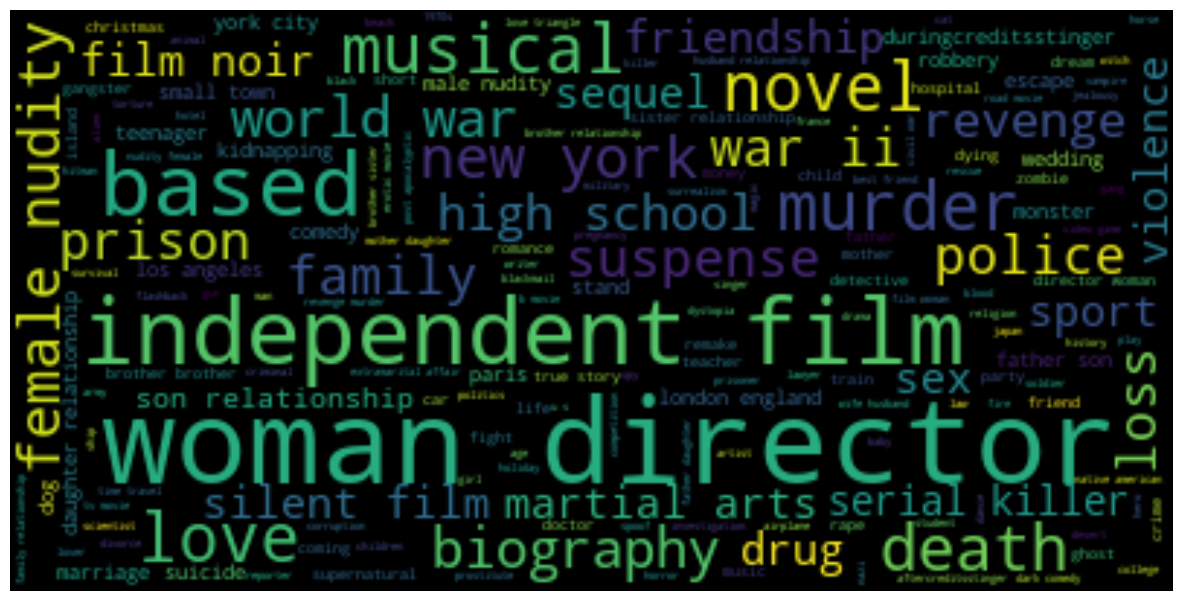

In [15]:
#wordcloud for Keywords alone
# string_text_1

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

# use the standard stopwords in the WordCloud english library (https://github.com/amueller/word_cloud#word_cloud)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(string_text_1)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# plt.show()

(-0.5, 399.5, 199.5, -0.5)

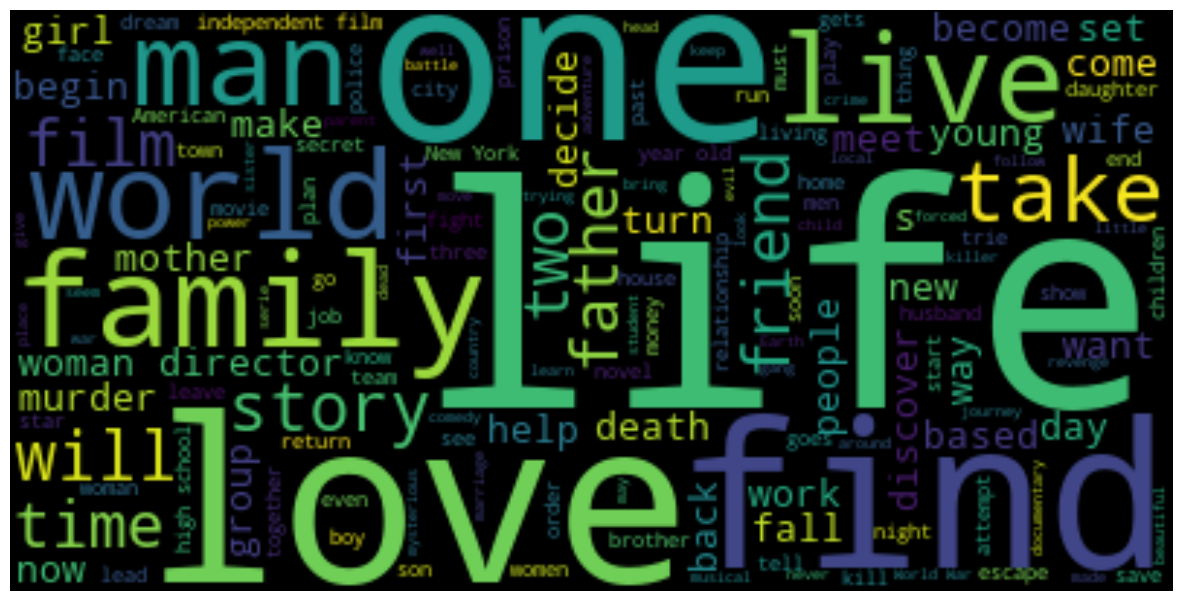

In [14]:


# use the standard stopwords in the WordCloud english library (https://github.com/amueller/word_cloud#word_cloud)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(master_string_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# plt.show()